<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

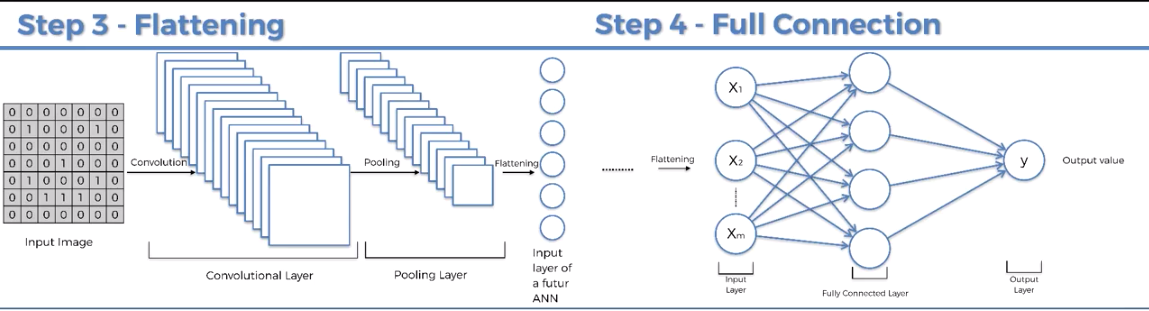

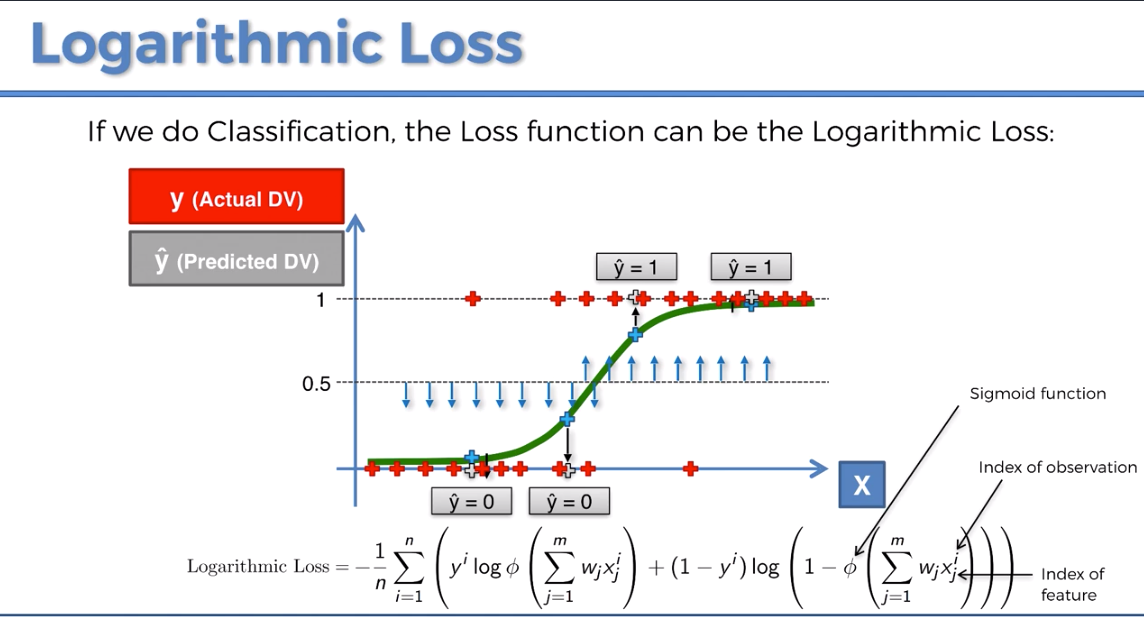

In [14]:
from IPython.display import display, Image

display(Image('../images/cnn_layers.png'))
display(Image('../images/log_loss_binary.png'))

In [17]:
%%writefile cnn.py

from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

# initiallize classifier
clf = Sequential()

# step 1: convolution
# input_shape 3,256,256 takes too long, here 3 is 3 color channels.
clf.add(Convolution2D(32, 3, 3, input_shape=(64, 64, 3), activation='relu'))

# step 2: pooling
clf.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))

# step 3: flattening
clf.add(Flatten())

# step 4: full connection
clf.add(Dense(units=128, activation='relu'))
clf.add(Dense(units=1, activation='sigmoid'))

# compile the cnn
clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# part2: fitting the cnn to the images
# https://keras.io/preprocessing/image/
# we create two instances with the same arguments
train_datagen = ImageDataGenerator(
    rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

training_set = train_datagen.flow_from_directory(
    '../dataset/training_set',  # change
    target_size=(64, 64),  # change
    batch_size=32,
    class_mode='binary')  # binary for cats and dogs

test_set = test_datagen.flow_from_directory(
    '../dataset/test_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

clf.fit_generator(
    training_set,
    steps_per_epoch=8000,
    epochs=25,
    validation_data=test_set,  # change
    nb_val_samples=2000)  # change

Overwriting cnn.py
